In [2]:
# Import Matplotlib and allow plots to show in the Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline
# Import NumPy and Pandas
import numpy as np
import pandas as pd
# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

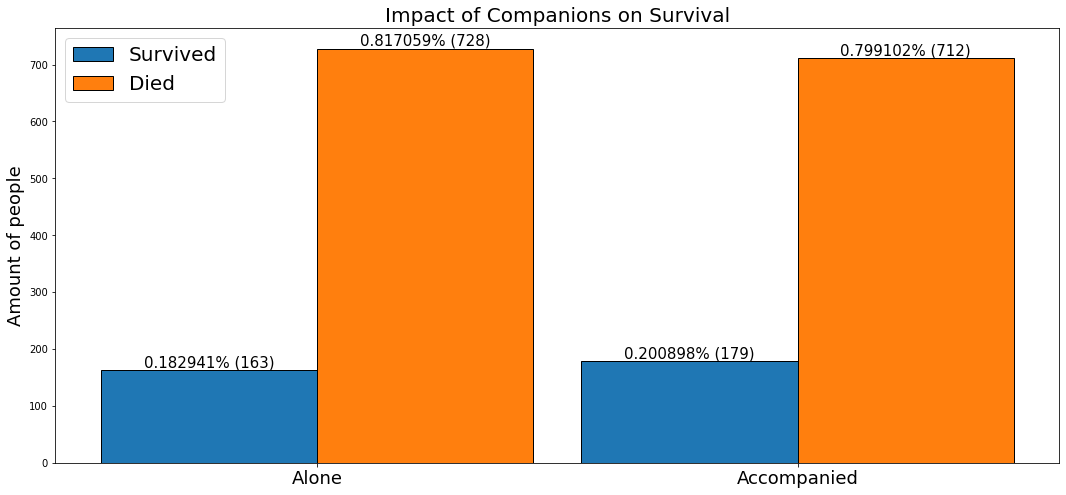

In [48]:
def preparePercentageString(value, maxValue):
    percentage = '{:2f}'.format(value/ maxValue, 2 * 100)
    return f'{percentage}% ({value})'

def draw_companions_impact_plot(file_name):
    df = pd.read_csv(file_name)
    axis_amount = len(df.index)
    
    alone_and_survived = np.sum((df['Survived'] == 1) & (df['Companions'] == 0))
    alone_and_died = axis_amount - alone_and_survived
        
    accompanied_and_survived = np.sum((df['Survived'] == 1) & (df['Companions'] > 0))
    accompanied_and_died = axis_amount - accompanied_and_survived
    
    died = [alone_and_died, accompanied_and_died]
    survived = [alone_and_survived, accompanied_and_survived]
    
    spc = np.arange(2)
    plt.ylabel("Amount of people", fontsize=18)
    plt.rcParams["figure.figsize"] = (18,8)
    plt.bar(spc, survived, width=0.45, label='Survived', edgecolor='k')
    plt.bar(spc + 0.45, died, width=0.45, label='Died', edgecolor='k')
    plt.xticks(spc + 0.45/2, ('Alone', 'Accompanied'), fontsize=18)
    plt.legend(loc=2, prop={'size': 20})
    plt.title('Impact of Companions on Survival', fontsize=20)
    
    for i in range(len(died)):
        plt.annotate(preparePercentageString(died[i], axis_amount), xy=(i + 0.45,died[i]), ha='center', va='bottom', fontsize=15)
        plt.annotate(preparePercentageString(survived[i], axis_amount), xy=(i ,survived[i]), ha='center', va='bottom', fontsize=15)
        
draw_companions_impact_plot("train_data_results.csv")

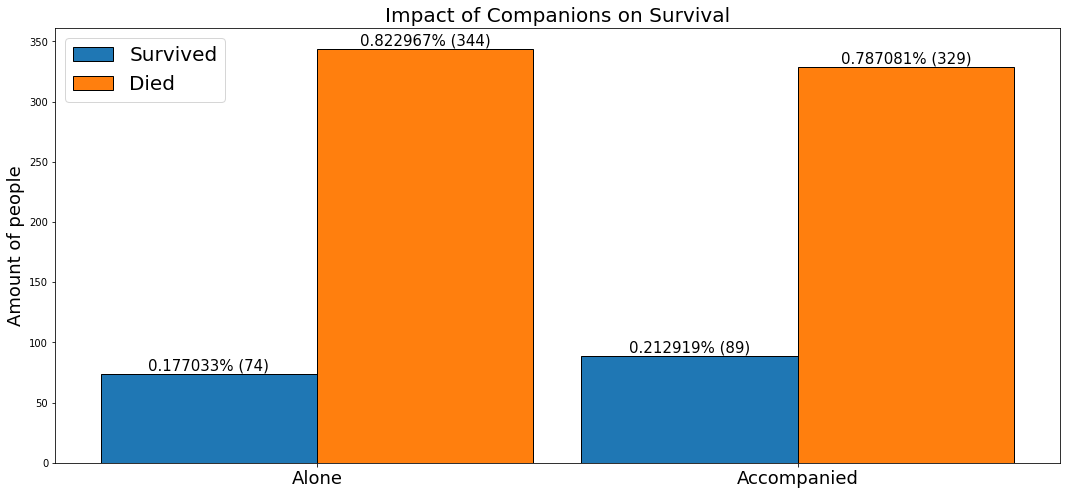

In [49]:
draw_companions_impact_plot("test-data-results.csv")

In [44]:
def draw_entry_place_impact_plot(file_name):
    df = pd.read_csv(file_name)
    axis_amount = len(df.index)
    cherbourg_and_survived = np.sum((df['Survived'] == 1) & (df['Embarked_C'] == 1))
    cherbourg_and_died = np.sum((df['Survived'] == 0) & (df['Embarked_C'] == 1))
    
    queenstown_and_survived = np.sum((df['Survived'] == 1) & (df['Embarked_Q'] == 1))
    queenstown_and_died = np.sum((df['Survived'] == 0) & (df['Embarked_Q'] == 1))
    
    southampton_and_survived = np.sum((df['Survived'] == 1) & (df['Embarked_S'] == 1))
    southampton_and_died = np.sum((df['Survived'] == 0) & (df['Embarked_S'] == 1))
    
    survived = [cherbourg_and_survived, queenstown_and_survived, southampton_and_survived]    
    died = [cherbourg_and_died, queenstown_and_died, southampton_and_died]
    
    spc = np.arange(3)
    plt.ylabel("Amount of people", fontsize=18)
    plt.title('Impact of Entry Place on Survival', fontsize=20)

    entry_places = ['Cherbourg', 'Queenstown', 'Southampton']
    X_Tick_List = []
    X_Tick_Label_List=[]
    
    for ep in range (0,len(entry_places)):
        X_Tick_List.append(ep+0.45/2)
        X_Tick_Label_List.append(entry_places[ep])
    
    plt.rcParams["figure.figsize"] = (18,8)
    plt.bar(spc, survived, width=0.45, label='Survived', edgecolor='k')
    plt.bar(spc + 0.45, died, width=0.45, label='Died', edgecolor='k')
    plt.xticks(X_Tick_List, X_Tick_Label_List, fontsize=18)
    plt.legend(loc=2, prop={'size': 20})
    
    for i in range(len(died)):
        plt.annotate(preparePercentageString(died[i], axis_amount), xy=(i + 0.45,died[i]), ha='center', va='bottom', fontsize=15)
        plt.annotate(preparePercentageString(survived[i], axis_amount), xy=(i ,survived[i]), ha='center', va='bottom', fontsize=15)


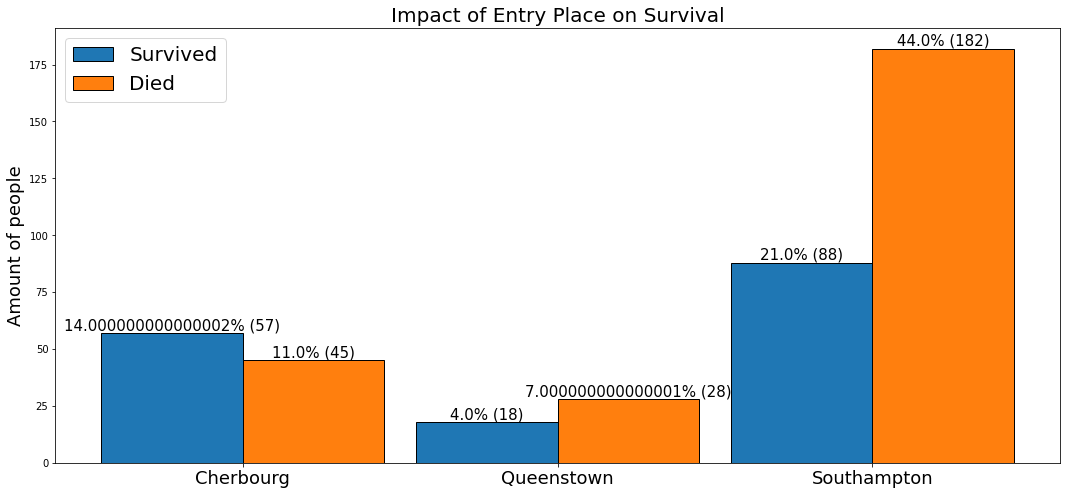

In [45]:
draw_entry_place_impact_plot("test-data-results.csv")